# EECS3401 Final Project

# Author: Ilia Azari, Santusht Arora, Faraz Akbarzadeh, Dan Logvinovsky (Team 10)

**Original Dataset Source: ELGIRIYEWITHANA ,NIDULA . (n.d.). World Stock Prices (Daily Updating). Kaggle. https://www.kaggle.com/datasets/nelgiriyewithana/world-stock-prices-daily-updating?resource=download


# World Stock Prices Description

This Dataset has 12 attributes (listed below) and 279,753 instances of data

**Attributes for student-mat-modified-RA.csv dataset:**

1. Date: The date of the stock price data.
2. Open: The opening price of the stock on that date.
3. High: The highest price the stock reached during the trading day.
4. Low: The lowest price the stock reached during the trading day.
5. Close: The closing price of the stock on that date.
6. Volume: The trading volume, i.e., the number of shares traded on that date.
7. Dividends: Dividends paid on that date (if any).
8. Stock Splits: Information about stock splits (if any).
9. Brand_Name: The name of the brand or company.
10. Ticker: Ticker symbol for the stock.
11. Industry_Tag: The industry category or sector to which the brand belongs.
12. Country: The country where the brand is headquartered or primarily operates.

# Look at the big picture

### Frame the problem (TODO)
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
We are looking to see if we can accurately predict future stock prices.

In [1]:
# Import libraries
# you can install missing library using pip install numpy 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [2]:
# Download the dataset
# If there is no separator, you can use df = pd.read_csv(url)
# If the dataset is on your local machine use df = pd.read_csv("datasets/student/student-mat-modified-RA.csv")
# If reading from UCI directly, some datasets are available thorugh the ucimlrepo (https://github.com/uci-ml-repo/ucimlrepo)

url = "https://raw.githubusercontent.com/iliaaz101/EECS3401Project/main/World-Stock-Prices-Dataset.csv?token=GHSAT0AAAAAACOWS2ZW2GPVZVPQK5GAI5XAZP5IXDA"
stocks = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
stocks_backup = stocks

## Taking a look at the content of our Dataset

#### We take a look at some of the details of our Dataset

#### A look at the full set of our data

In [3]:
stocks

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
279748,2023-08-29 00:00:00-04:00,18.719999,18.770000,18.020000,18.320000,5949600.0,0.0,0.0,foot locker,FL,footwear,usa
279749,2023-08-30 00:00:00-04:00,18.180000,18.650000,17.879999,18.549999,5829500.0,0.0,0.0,foot locker,FL,footwear,usa
279750,2023-08-31 00:00:00-04:00,18.620001,19.850000,18.469999,19.620001,6316100.0,0.0,0.0,foot locker,FL,footwear,usa
279751,2023-09-01 00:00:00-04:00,19.660000,20.139999,19.400000,19.870001,3982400.0,0.0,0.0,foot locker,FL,footwear,usa



#### Using head() to just lower that to the first 5 items in the dataset


In [4]:
stocks.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa


#### Using Describe to look at the numerical data in the dataset.

In [5]:
stocks.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,279753.000000,279753.000000,279753.000000,279753.000000,2.797530e+05,279753.000000,279753.000000
mean,65.162445,65.914283,64.389596,65.167955,2.349103e+07,0.003406,0.000751
std,117.203158,118.573147,115.772027,117.190963,8.864361e+07,0.062041,0.073979
min,0.196890,0.199922,0.192798,0.198861,0.000000e+00,0.000000,0.000000
25%,15.049936,15.253301,14.837500,15.050000,1.350600e+06,0.000000,0.000000
50%,32.329837,32.712338,31.923977,32.330002,4.630800e+06,0.000000,0.000000
75%,72.318681,72.980003,71.635438,72.348923,1.238360e+07,0.000000,0.000000
max,2165.010010,2175.010010,2138.050049,2153.199951,7.421641e+09,10.000000,20.000000


#### Using Info to get a description of our data with data types and non null counts

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279753 entries, 0 to 279752
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          279753 non-null  object 
 1   Open          279753 non-null  float64
 2   High          279753 non-null  float64
 3   Low           279753 non-null  float64
 4   Close         279753 non-null  float64
 5   Volume        279753 non-null  float64
 6   Dividends     279753 non-null  float64
 7   Stock Splits  279753 non-null  float64
 8   Brand_Name    279753 non-null  object 
 9   Ticker        279753 non-null  object 
 10  Industry_Tag  279753 non-null  object 
 11  Country       279753 non-null  object 
dtypes: float64(7), object(5)
memory usage: 25.6+ MB


#### Checking our categorical types using value_counts to see which occur the most often

In [7]:
stocks["Industry_Tag"].value_counts()

Industry_Tag
technology            60453
retail                23875
automotive            22384
finance               20205
apparel               19086
food & beverage       17906
consumer goods        17904
entertainment         11340
food                  10413
footwear              10405
aviation              10096
gaming                10050
hospitality            9129
e-commerce             8070
healthcare             5969
manufacturing          5969
logistics              5968
luxury goods           4443
financial services     1973
music                  1378
social media           1116
fitness                1005
cryptocurrency          616
Name: count, dtype: int64

In [8]:
stocks["Brand_Name"].value_counts()


Brand_Name
foot locker            5969
microsoft              5969
adobe                  5969
jpmorgan chase & co    5969
marriott               5969
                       ... 
peloton                1005
zoominfo                832
airbnb                  700
roblox                  640
coinbase                616
Name: count, Length: 61, dtype: int64

In [9]:
stocks["Ticker"].value_counts()


Ticker
FL      5969
MSFT    5969
ADBE    5969
JPM     5969
MAR     5969
        ... 
PTON    1005
ZI       832
ABNB     700
RBLX     640
COIN     616
Name: count, Length: 61, dtype: int64

In [10]:
stocks["Country"].value_counts()

Country
usa            219695
japan           17904
germany         14264
netherlands     11936
france           7885
switzerland      5968
canada           2101
Name: count, dtype: int64

# Exploring and visualizing the Data to preform Exploratory Data Analysis (EDA)


#### Using hist to plot a histogram of our dataset in it's totality

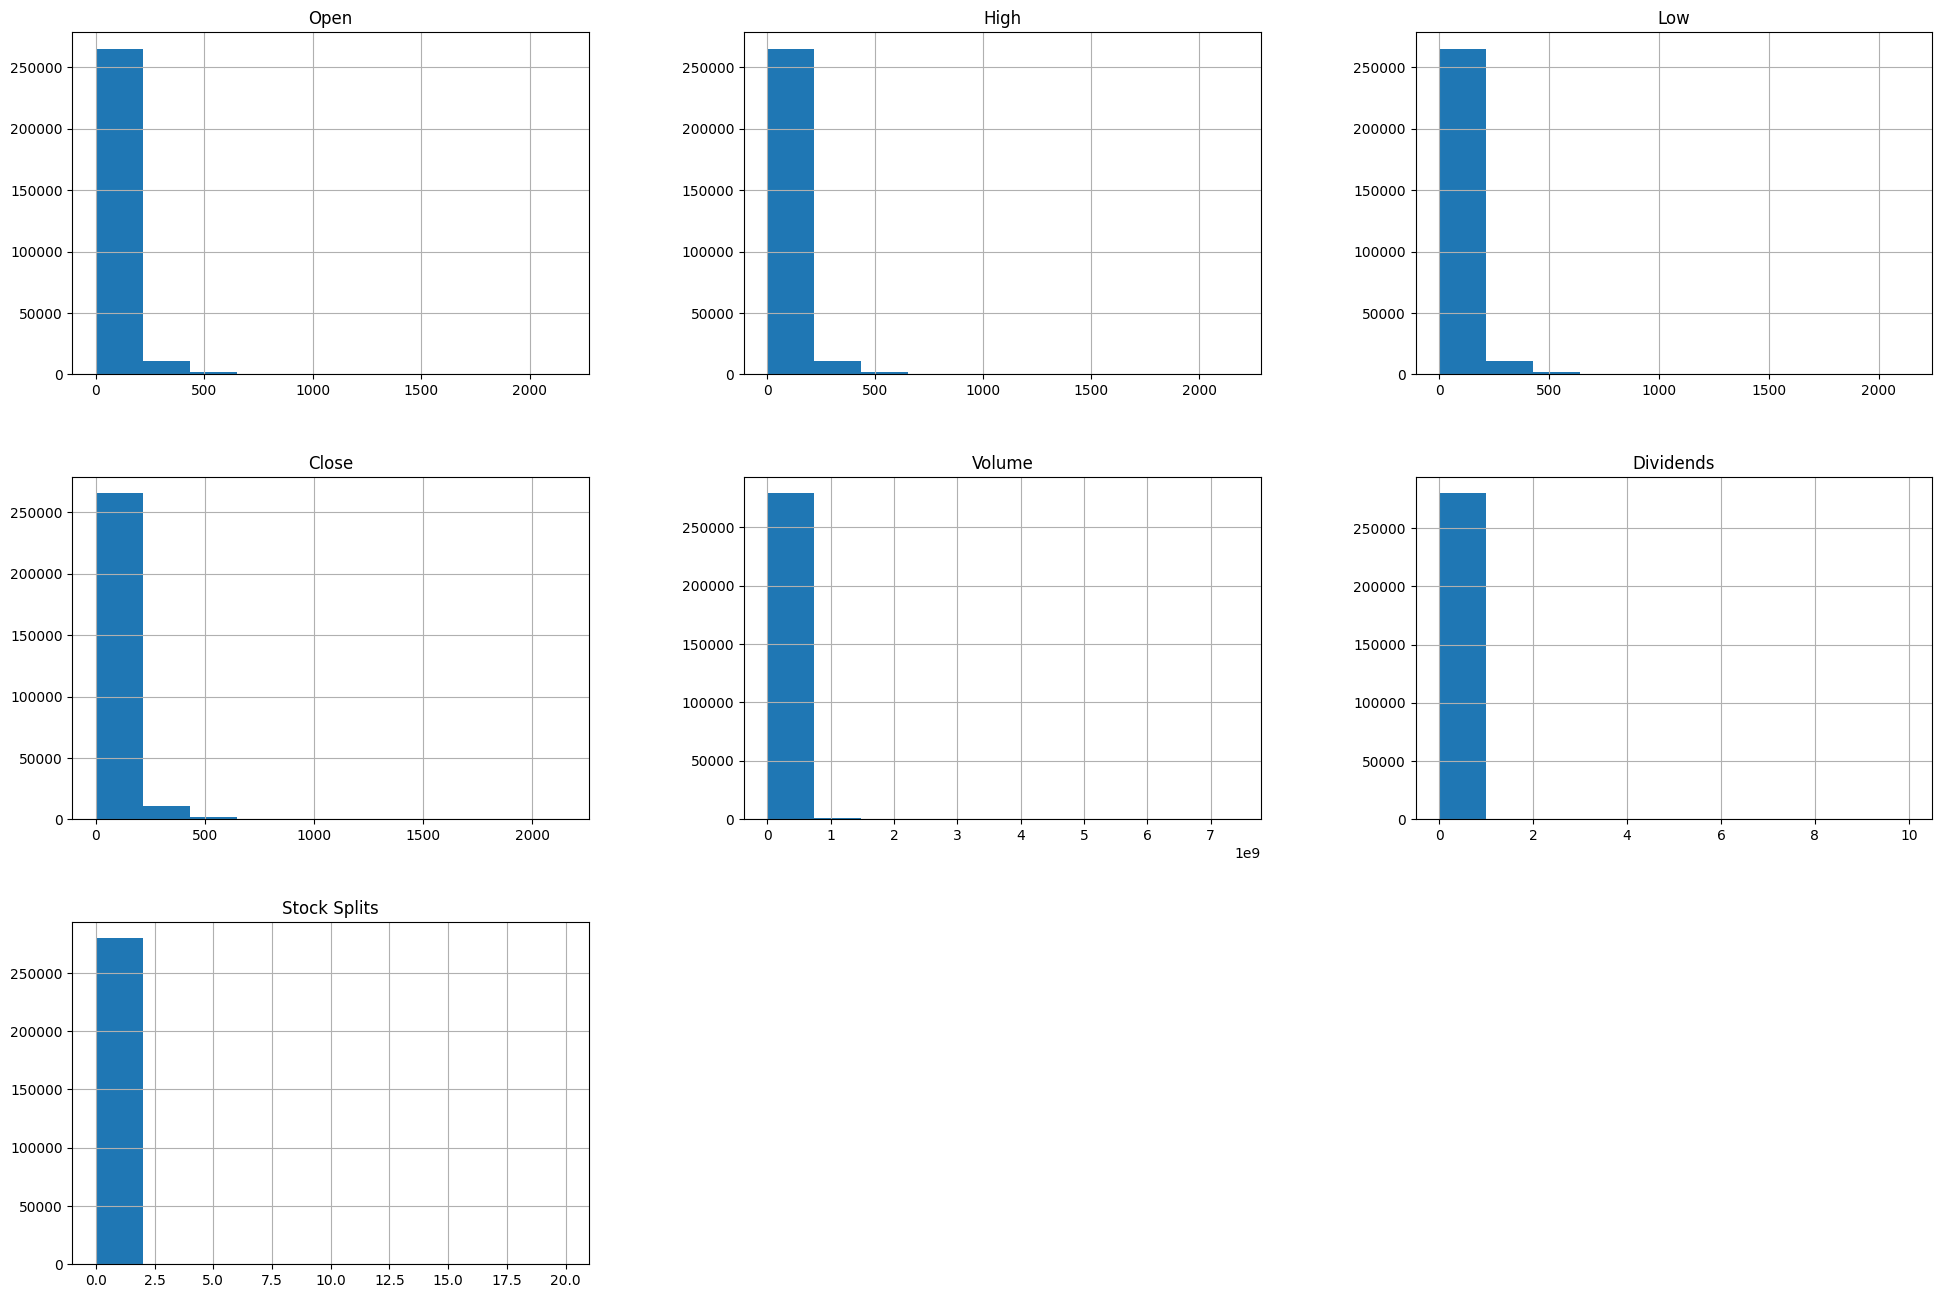

In [11]:
stocks.hist(figsize=(24, 16))
plt.show()

#### Increasing the number of bins to get more detail. 

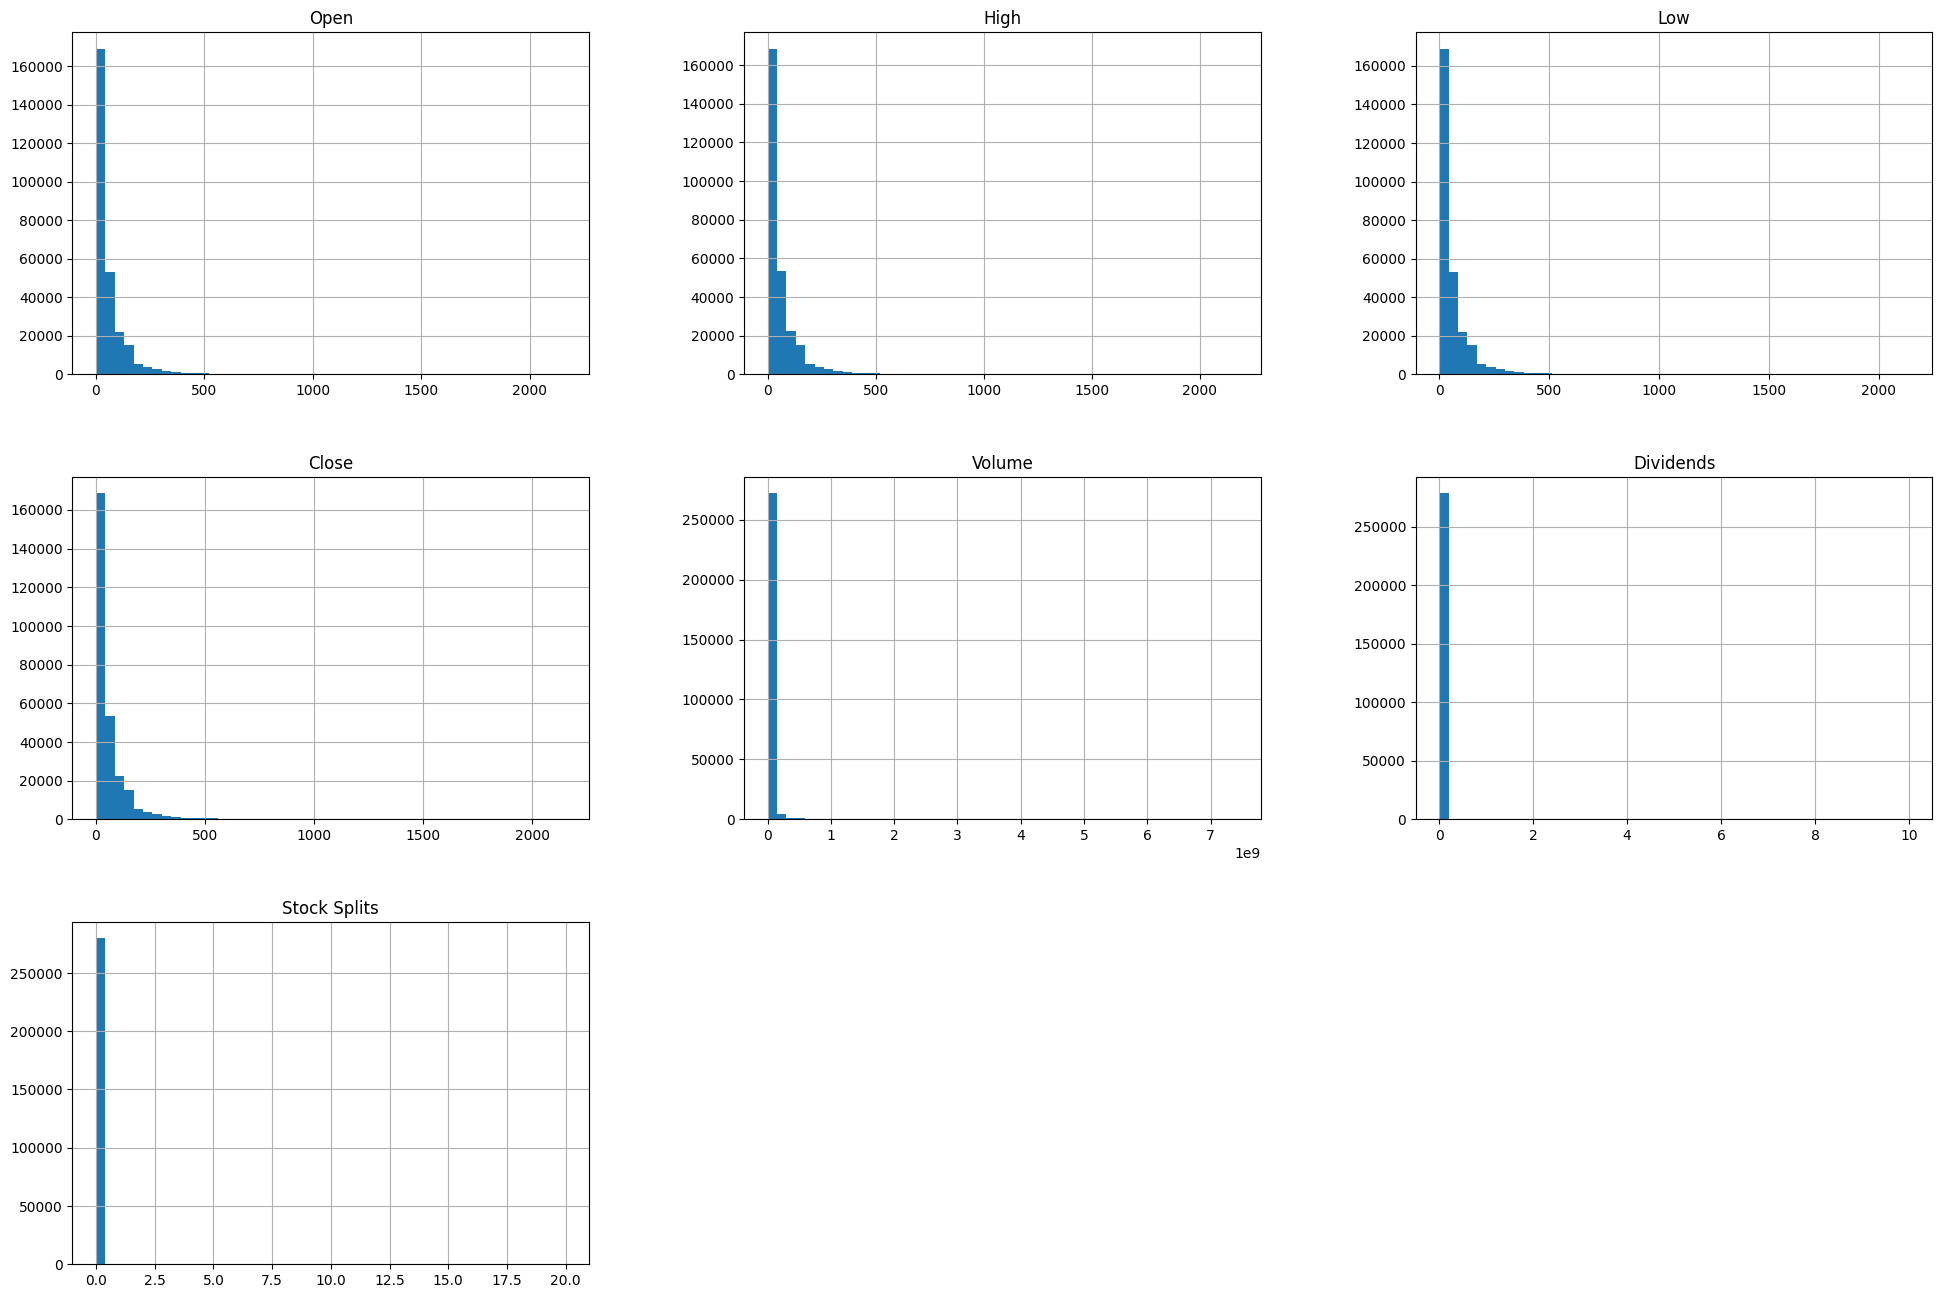

In [12]:
stocks.hist(bins=50, figsize=(24, 16))
plt.show()

#### Looking for correlations using pairplot

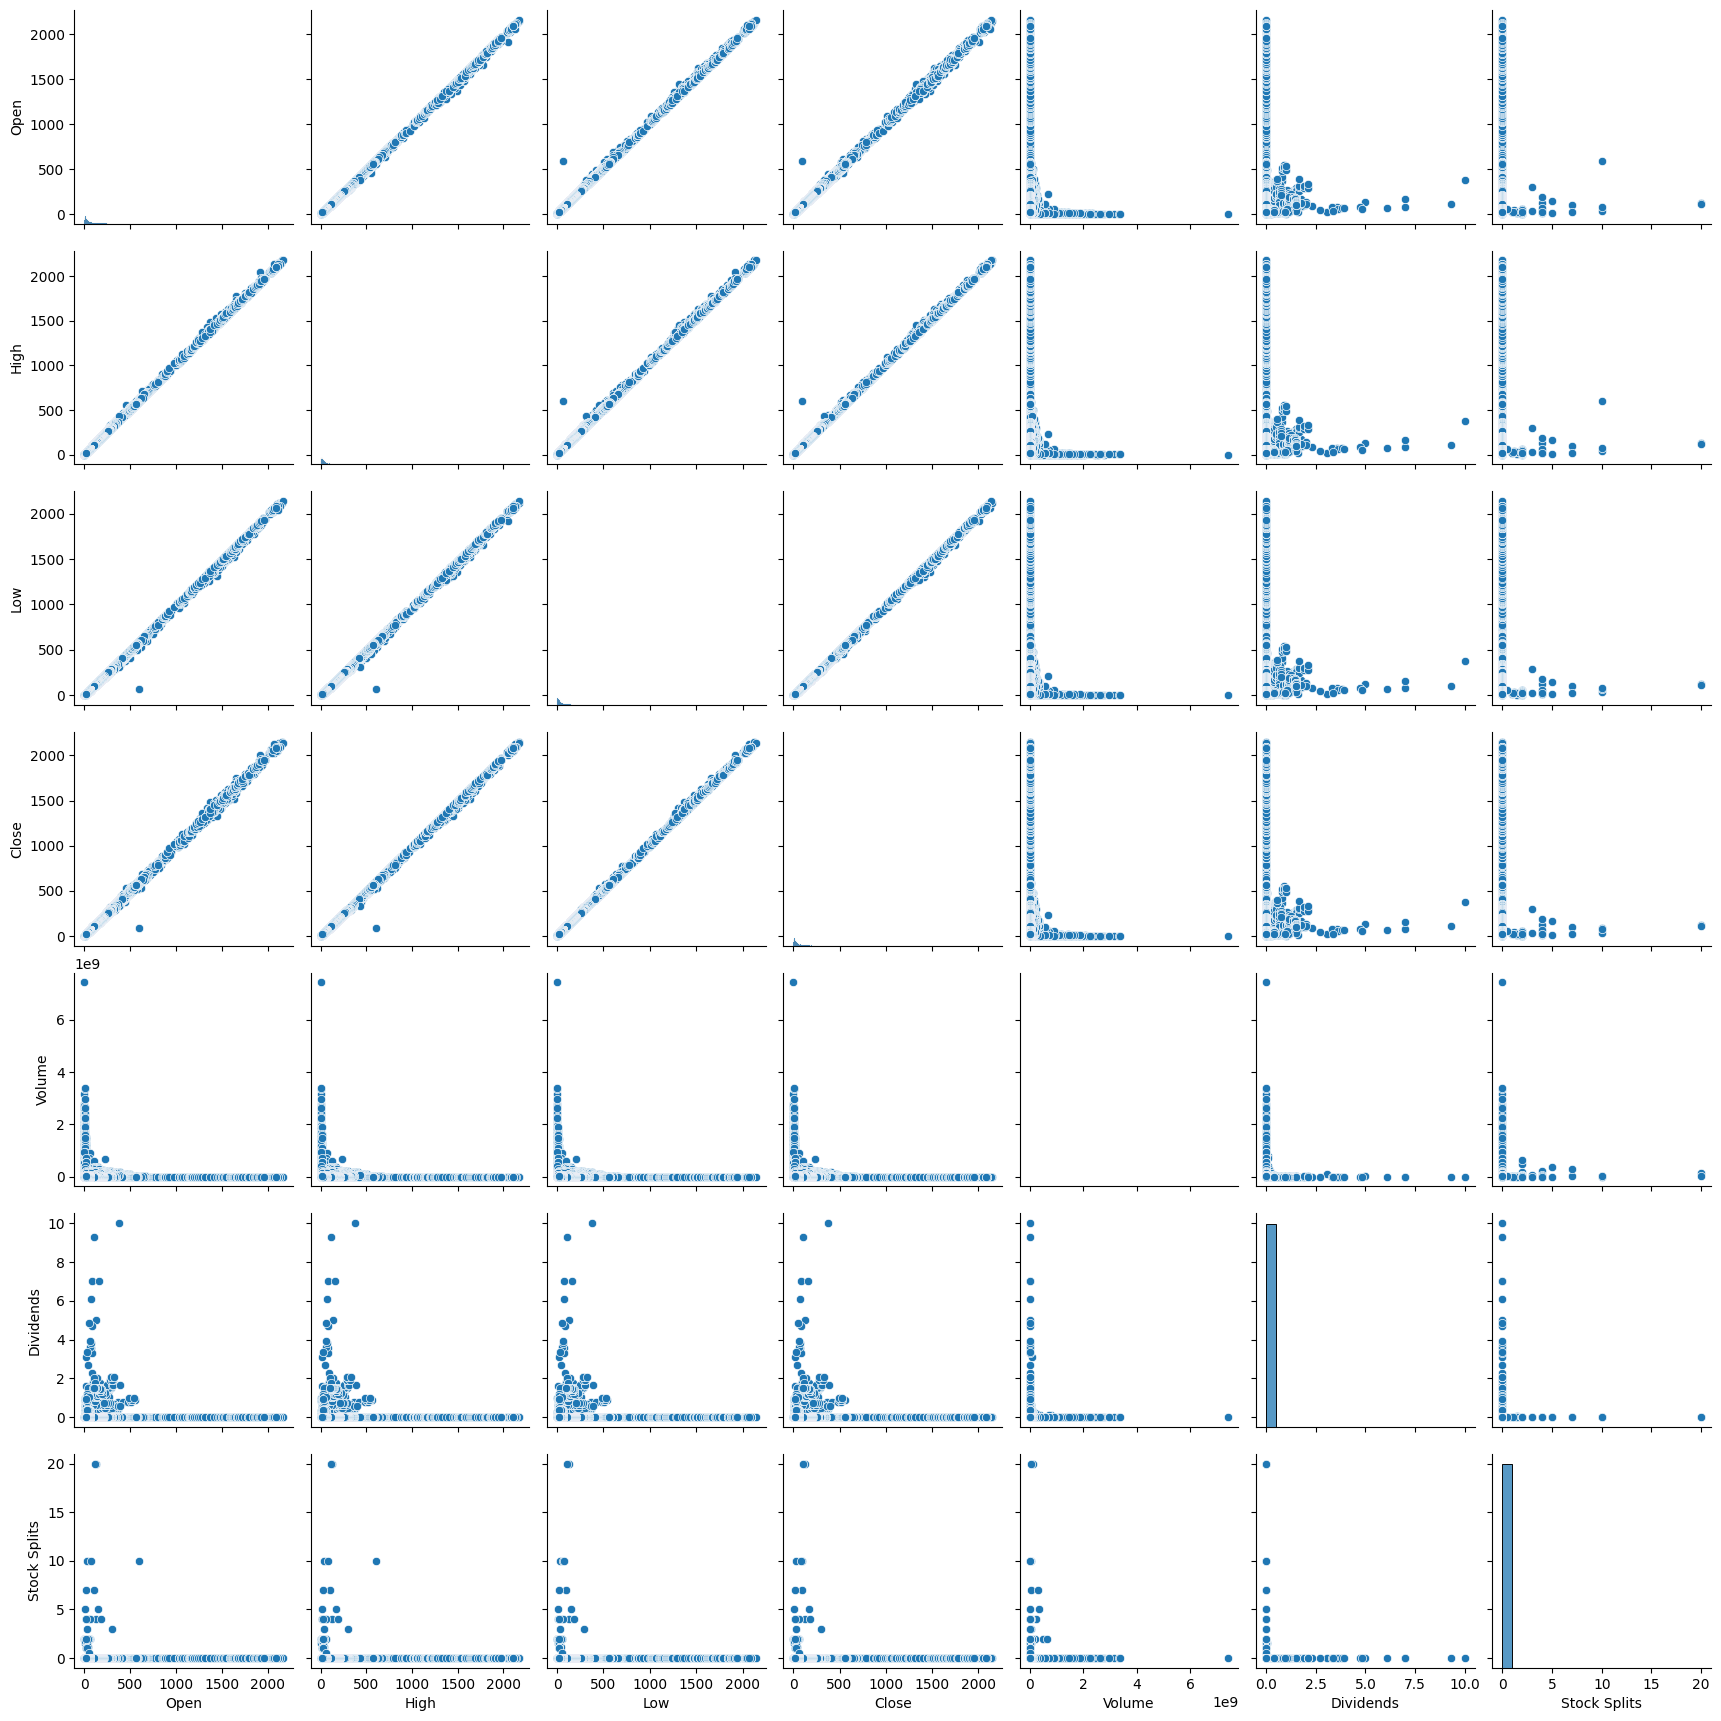

In [13]:
#Check for correlation between attributes using sns.pairplot.
sns.pairplot(stocks)

#### Looking for correlations using pearson correlation coefficient via using corr

In [17]:
corr_matrix = stocks.corr(numeric_only = True)
corr_matrix

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999911,0.999858,0.999780,-0.080539,0.017611,0.001836
High,0.999911,1.000000,0.999817,0.999873,-0.080192,0.017468,0.001907
Low,0.999858,0.999817,1.000000,0.999907,-0.080941,0.017755,-0.000366
Close,0.999780,0.999873,0.999907,1.000000,-0.080560,0.017617,-0.000224
Volume,-0.080539,-0.080192,-0.080941,-0.080560,1.000000,-0.009819,0.004537
Dividends,0.017611,0.017468,0.017755,0.017617,-0.009819,1.000000,-0.000499
Stock Splits,0.001836,0.001907,-0.000366,-0.000224,0.004537,-0.000499,1.000000


#### Looking at coroleation regarding specifically our target value (Close)

In [18]:
corr_matrix["Close"].sort_values(ascending=False)

Close           1.000000
Low             0.999907
High            0.999873
Open            0.999780
Dividends       0.017617
Stock Splits   -0.000224
Volume         -0.080560
Name: Close, dtype: float64

# Preparing our Data to use it for models

#### Checking for and removing any duplicate row should they exist

In [19]:
# Check for duplicate rows and delete them
stocks.duplicated().sum()

0

In [20]:
# Remove duplicated
stocks.drop_duplicates(inplace=True)

#### Removing the Dividend and Stocks Splits columns (Irrelevant)

In [21]:
# Dropping the Dividend feature

stocks.drop(labels=['Dividends'], axis=1, inplace=True)

# Dropping the Stock Splits feature

stocks.drop(labels=['Stock Splits'], axis=1, inplace=True)

#### Handle the missing values

In [22]:
# Find the number of missing values in each column

stocks.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64

#### Choosing only the Apple Data with Ticker AAPL

In [23]:
stocks = stocks[stocks['Ticker'] == 'AAPL']


#### Splitting the Date Column into Day, Month, Year and Keeping last 3 year info

In [24]:
import pandas as pd

# Assuming 'stocks' is your DataFrame

# Step 1: Ensure conversion to datetime, coercing errors to NaT
stocks['Date'] = pd.to_datetime(stocks['Date'], errors='coerce', utc=True)

# Optional: Handle rows with NaT in the 'Date' column
# For example, to drop these rows, uncomment the following line:
# stocks = stocks.dropna(subset=['Date'])

# Now, filter the dataset for dates from 2021 onwards
stocks = stocks[stocks['Date'].dt.year >= 2021]

# Step 2: Split the 'Date' column into 'Day', 'Month', and 'Year' columns
stocks['Day'] = stocks['Date'].dt.day
stocks['Month'] = stocks['Date'].dt.month
stocks['Year'] = stocks['Date'].dt.year

# Step 3: Drop the original 'Date' column
stocks = stocks.drop('Date', axis=1)

C:\Users\Dan\AppData\Local\Temp\ipykernel_29528\2089049159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['Date'] = pd.to_datetime(stocks['Date'], errors='coerce', utc=True)


# Rerunning all of our analysis now that we have cut down our Dataset

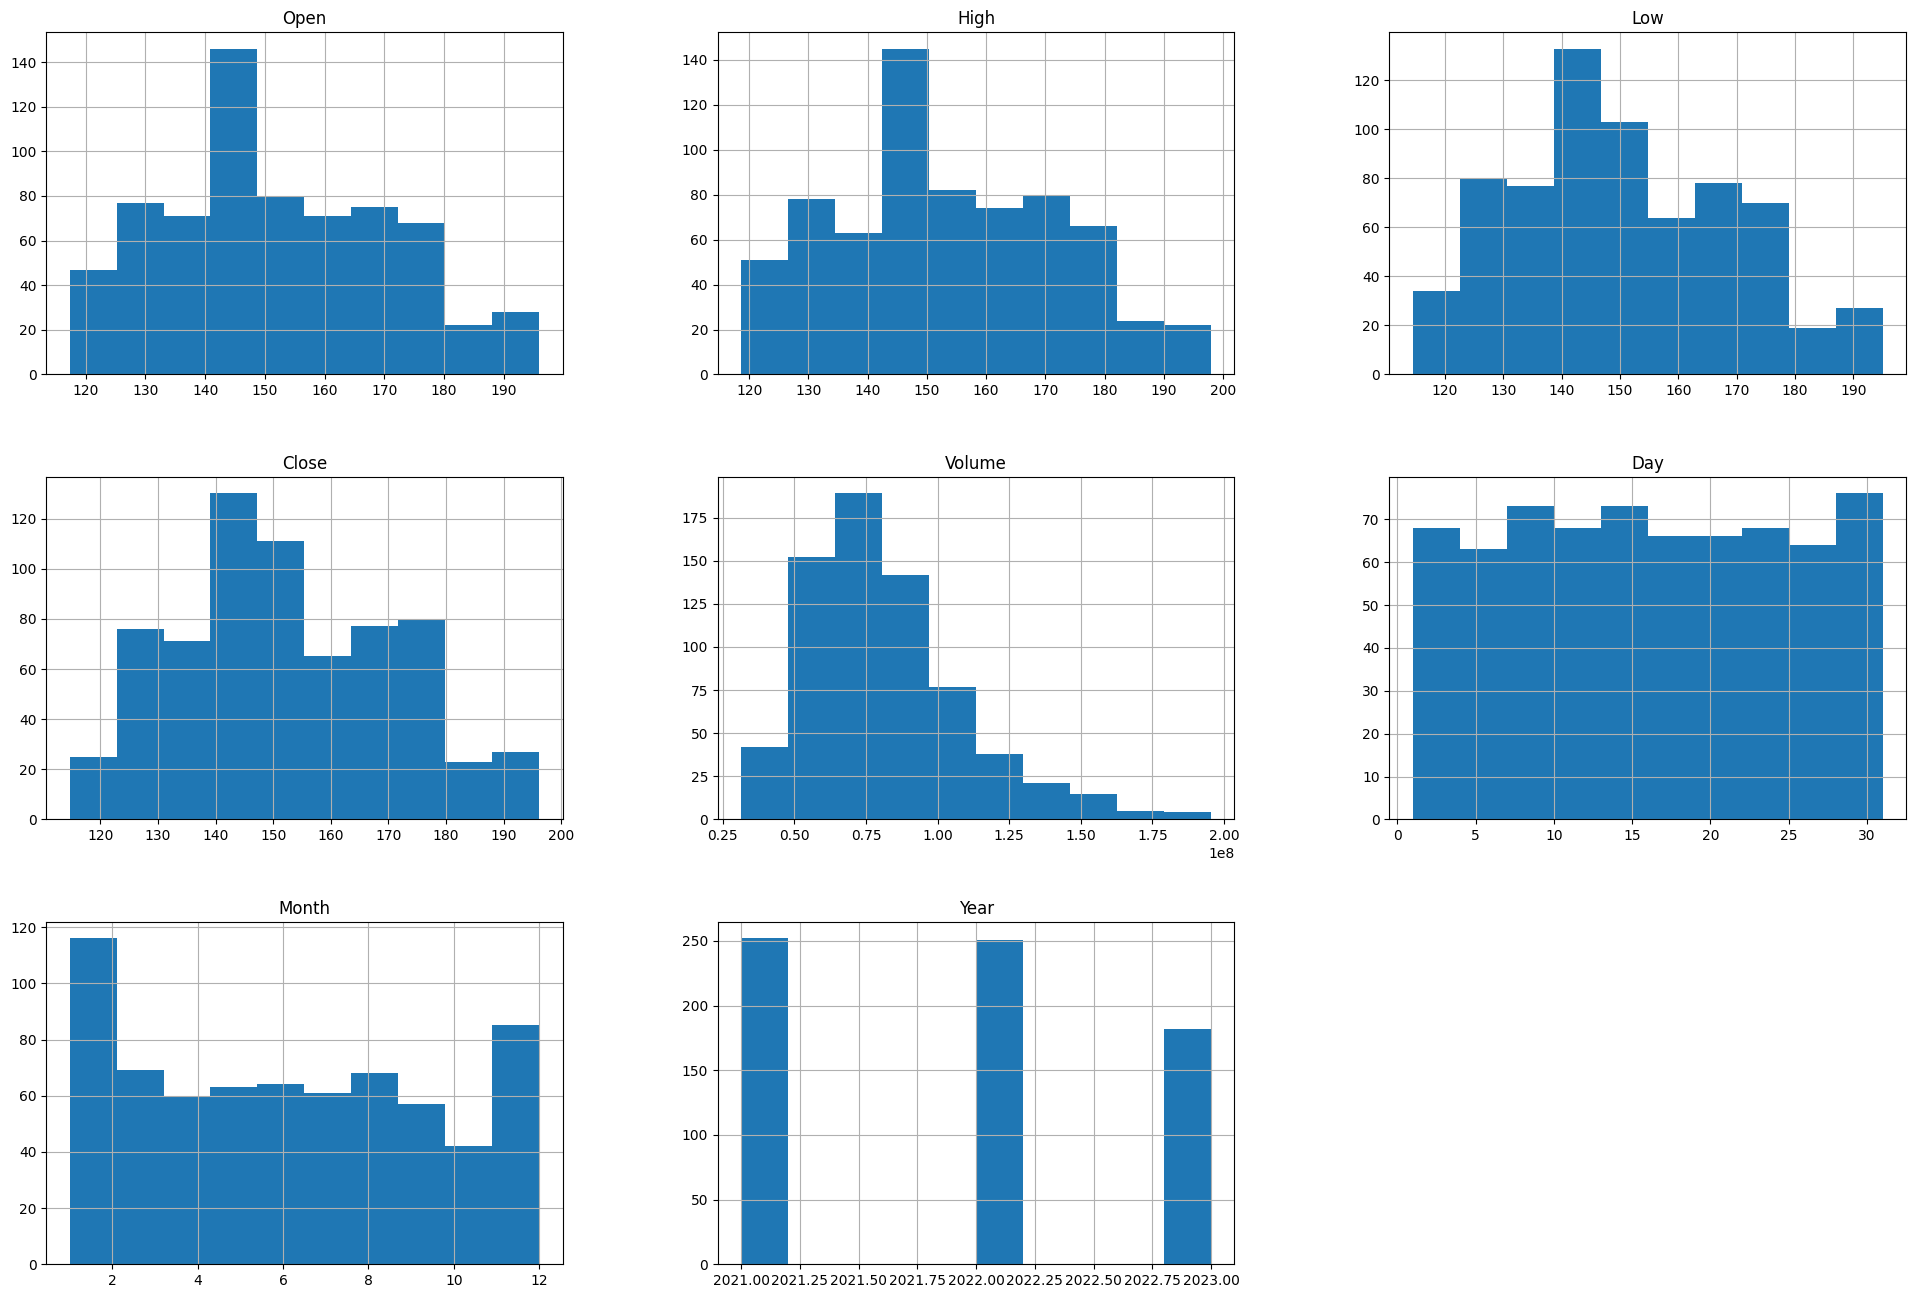

In [38]:
stocks.hist(figsize=(24, 16))
plt.show()

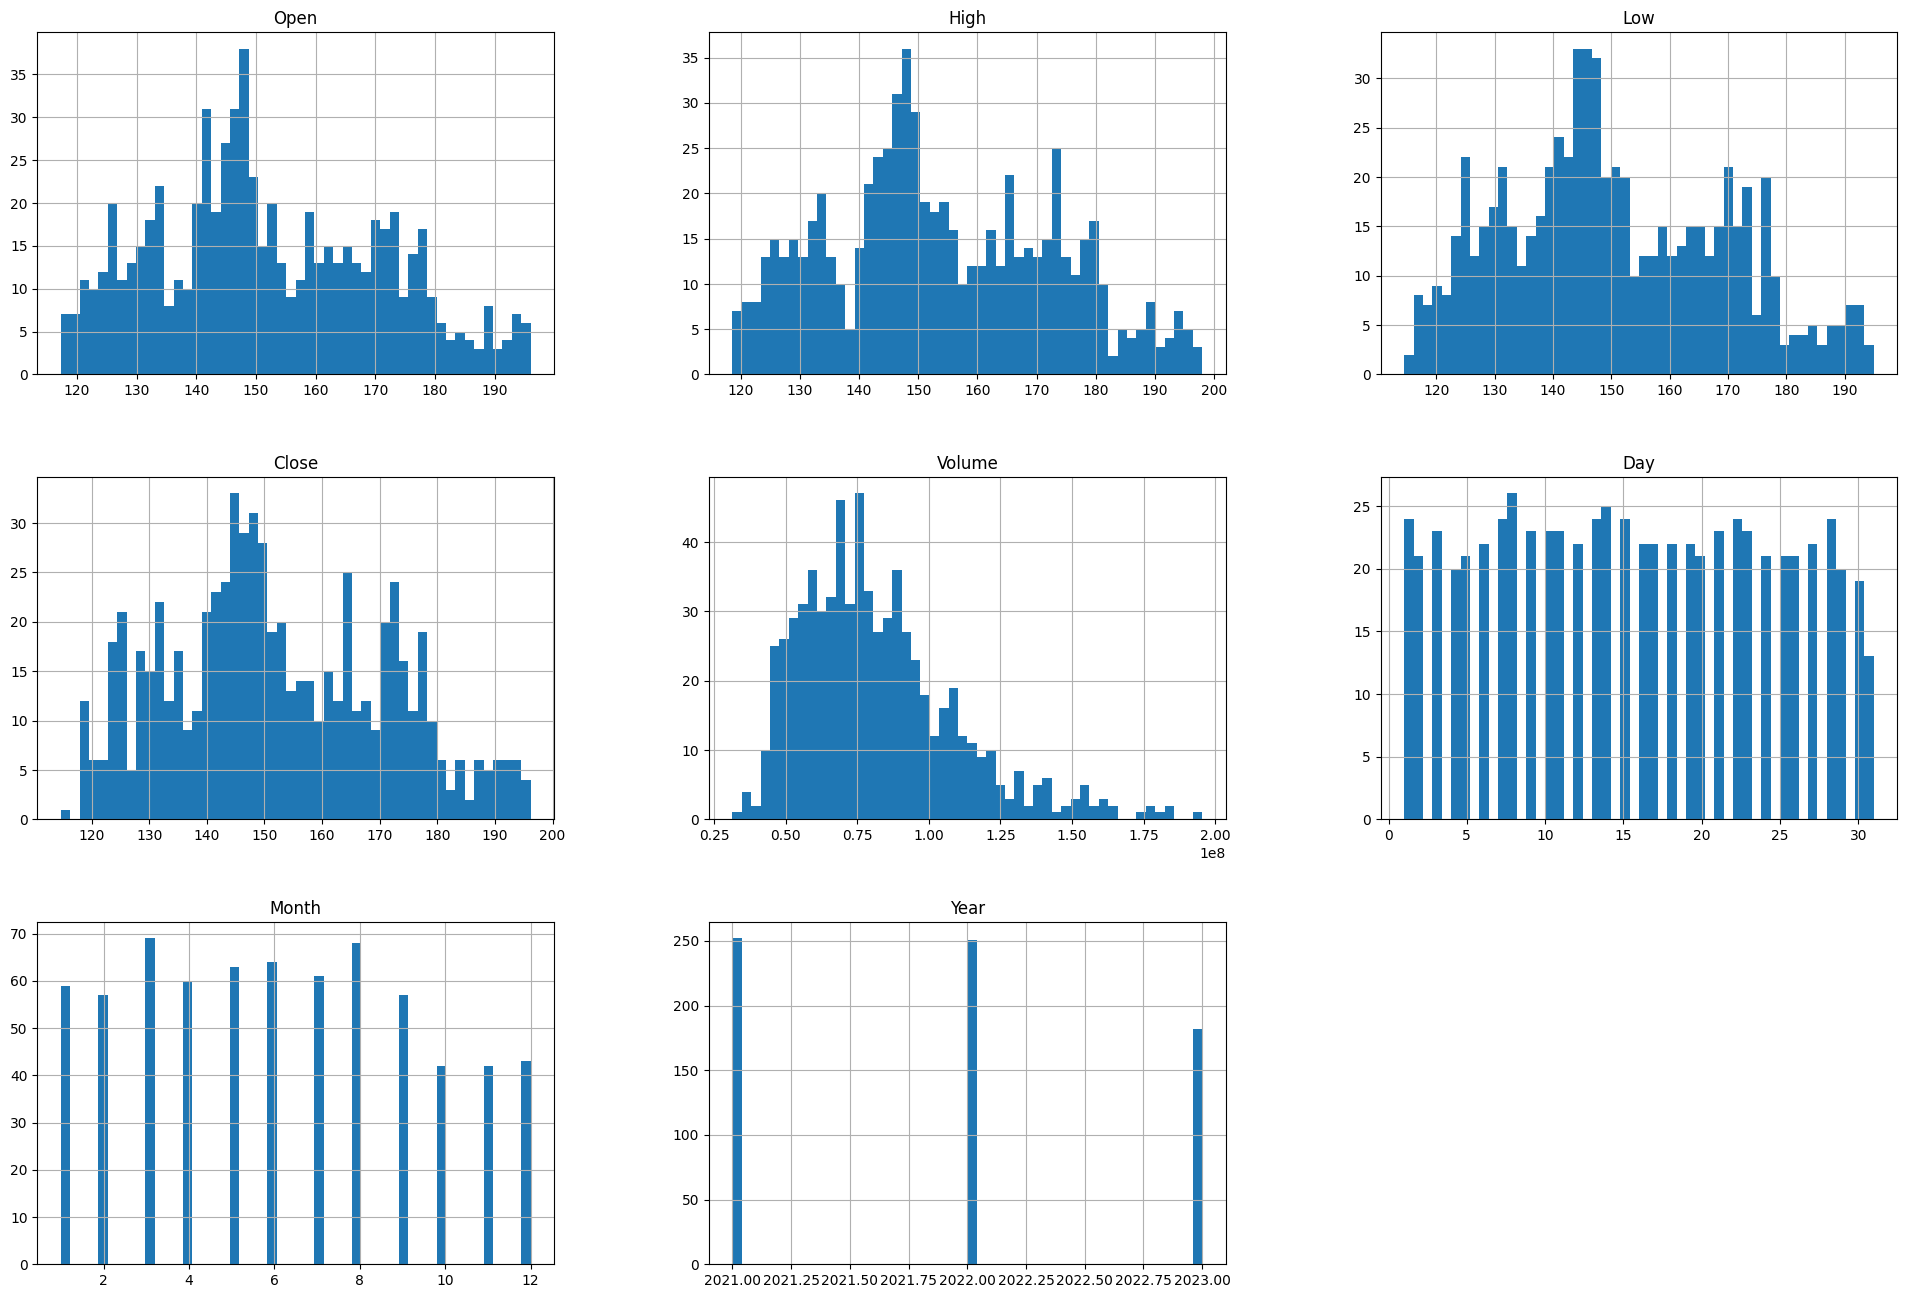

In [39]:
stocks.hist(bins=50, figsize=(24, 16))
plt.show()

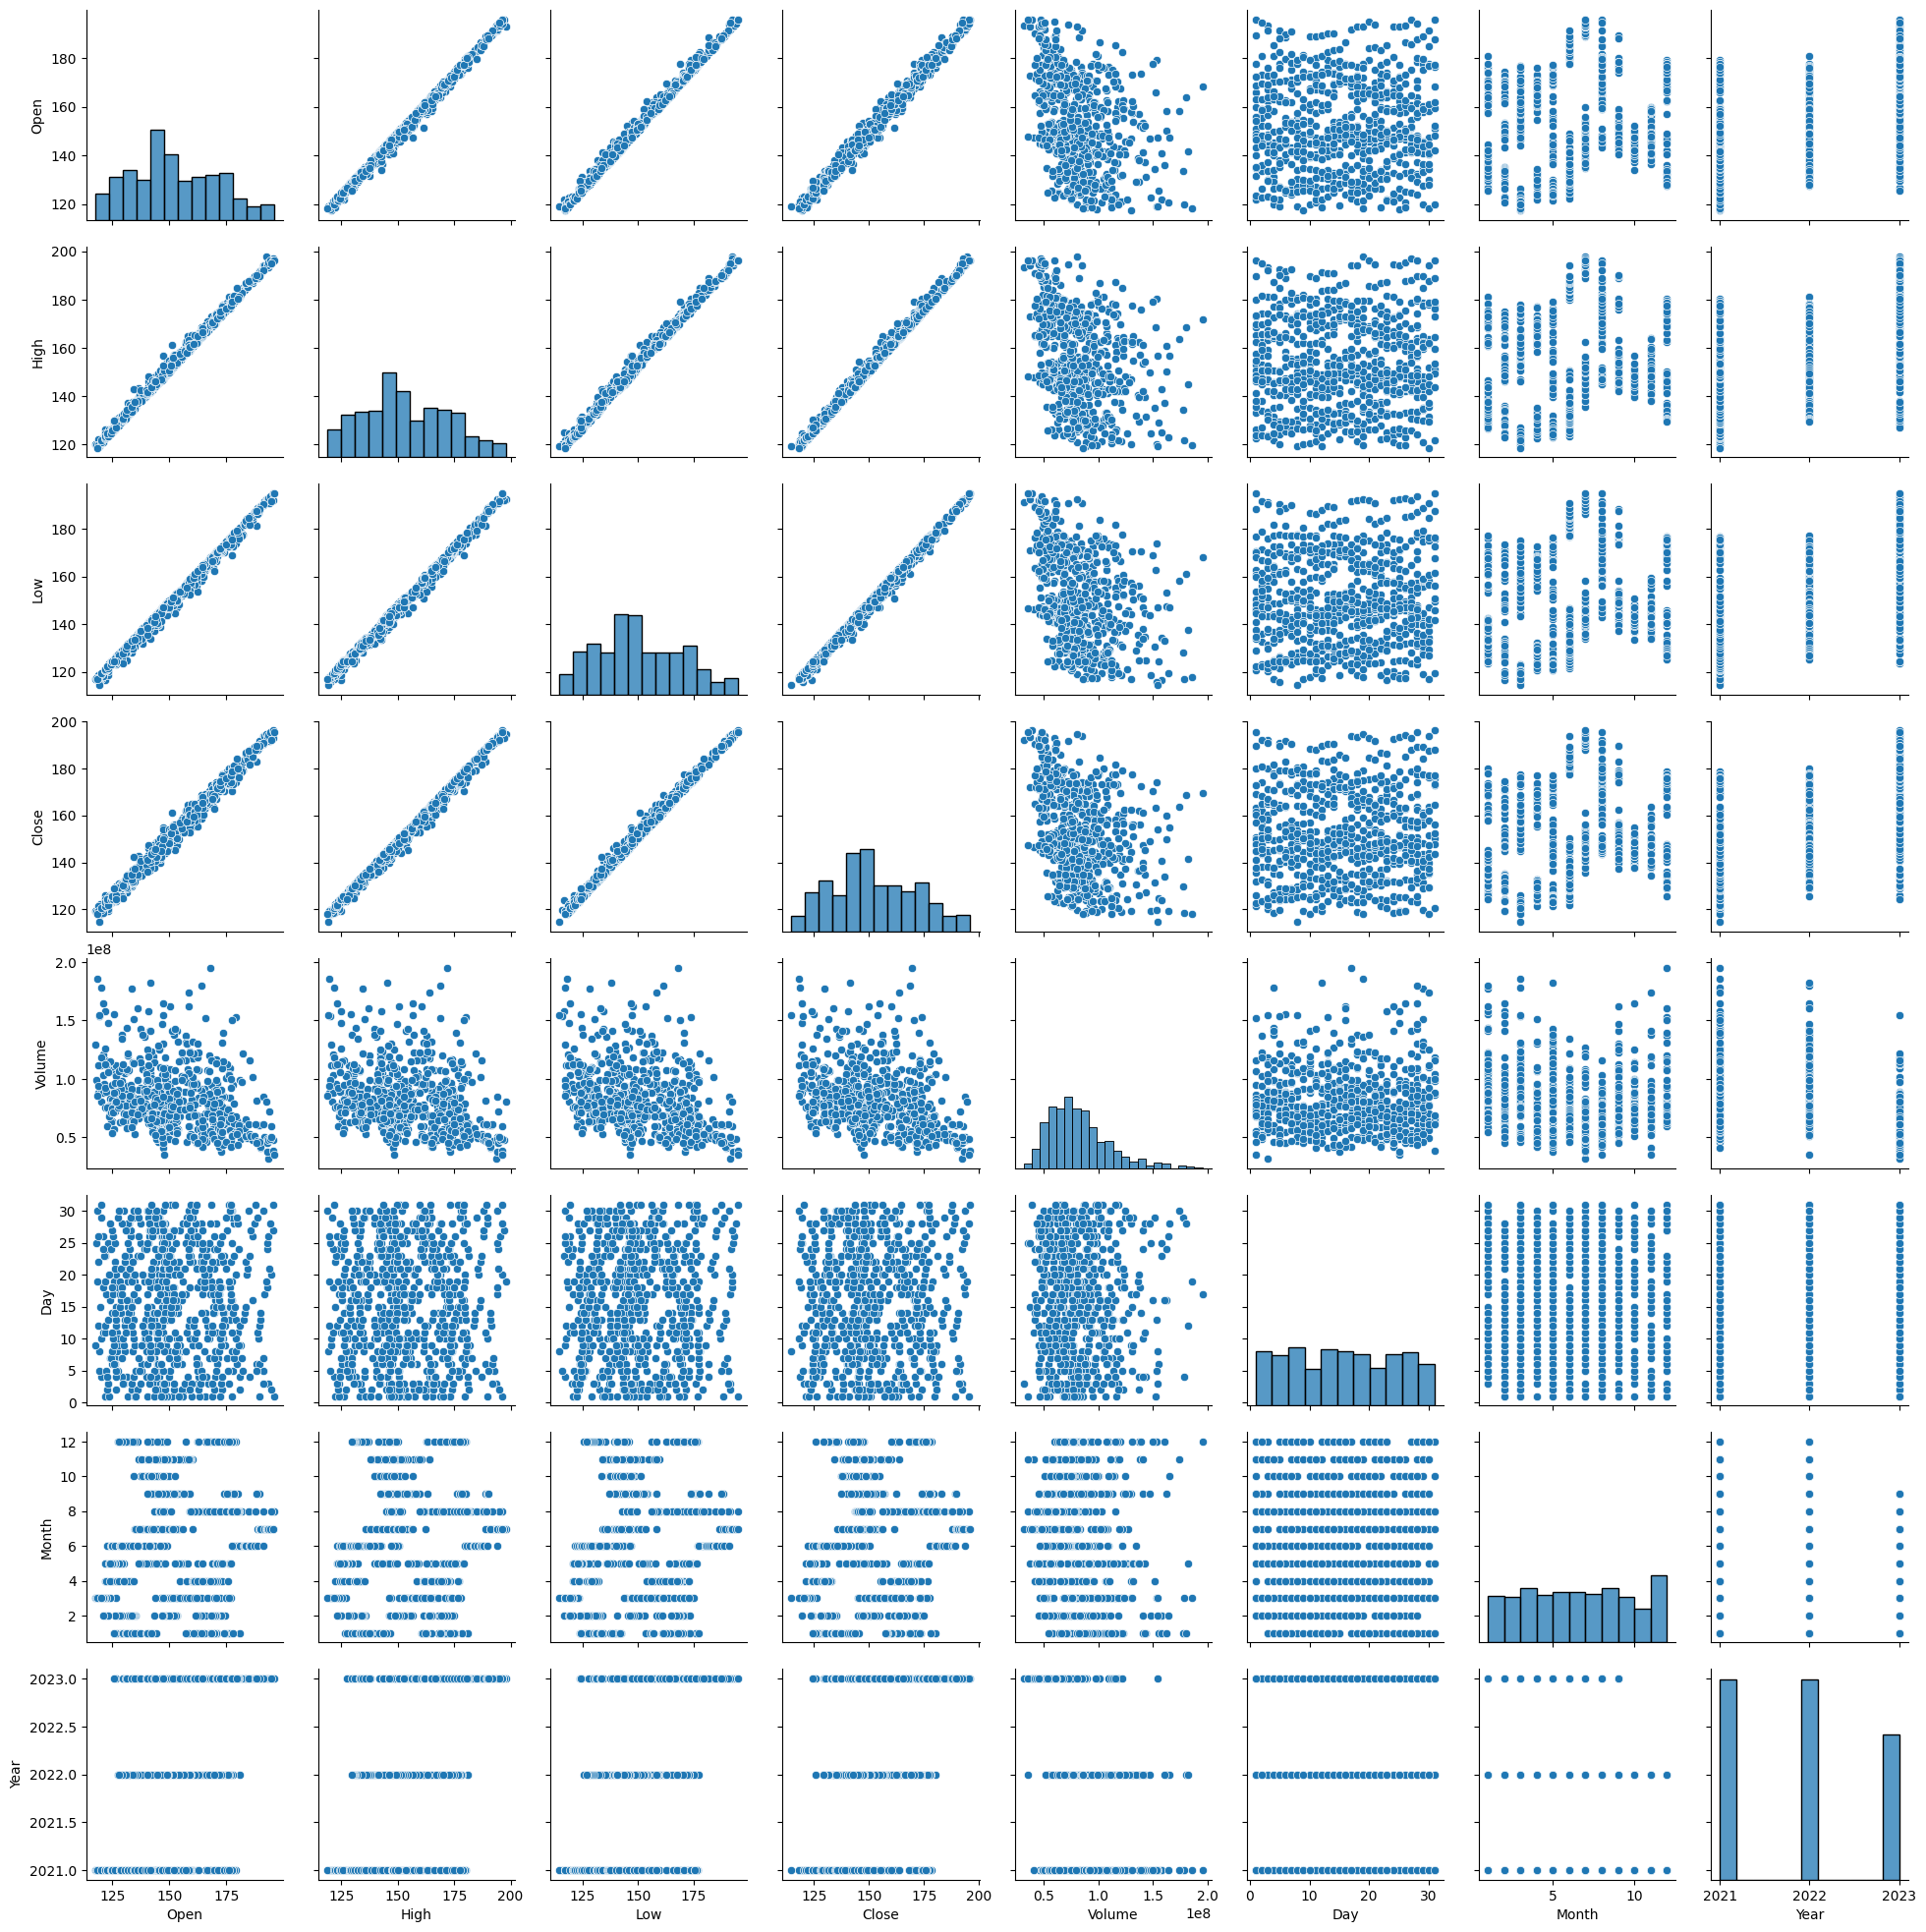

In [40]:
sns.pairplot(stocks)

In [41]:
corr_matrix = stocks.corr(numeric_only = True)
corr_matrix

,Open,High,Low,Close,Volume,Day,Month,Year
Open,1.000000,0.997204,0.996923,0.992669,-0.316275,0.009823,0.140388,0.603939
High,0.997204,1.000000,0.996535,0.996667,-0.293402,0.014199,0.139275,0.607476
Low,0.996923,0.996535,1.000000,0.996873,-0.345195,0.015494,0.140323,0.603808
Close,0.992669,0.996667,0.996873,1.000000,-0.320634,0.017658,0.138603,0.605930
Volume,-0.316275,-0.293402,-0.345195,-0.320634,1.000000,0.013837,-0.090083,-0.392529
Day,0.009823,0.014199,0.015494,0.017658,0.013837,1.000000,0.000244,-0.007575
Month,0.140388,0.139275,0.140323,0.138603,-0.090083,0.000244,1.000000,-0.186448
Year,0.603939,0.607476,0.603808,0.605930,-0.392529,-0.007575,-0.186448,1.000000


In [42]:
corr_matrix["Close"].sort_values(ascending=False)

Close     1.000000
Low       0.996873
High      0.996667
Open      0.992669
Year      0.605930
Month     0.138603
Day       0.017658
Volume   -0.320634
Name: Close, dtype: float64

# Creating a Pipeline to make our data into a usable form

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [26]:
#create the cat and num columns
num_cols = stocks.select_dtypes(include='number').columns.to_list()
cat_cols = stocks.select_dtypes(exclude='number').columns.to_list()

#exclude the target from numerical columns
num_cols.remove("Close")

#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

#### Displaying our Pipeline

In [27]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Open', 'High', 'Low', 'Volume', 'Day',
                                  'Month', 'Year']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Brand_Name', 'Ticker', 'Industry_Tag',
                                  'Country'])])

#### Applying our Preprocessing to our Data

In [28]:
# Apply preprocessing
stocks_prepared = preprocessing.fit_transform(stocks)

# Convert to dense matrix if necessary
if hasattr(stocks_prepared, "toarray"):
    stocks_prepared = stocks_prepared.toarray()

# Handling feature names for numerical columns
feature_names = num_cols.copy()

# Retrieving feature names for categorical features processed by OneHotEncoder
ohe_feature_names = preprocessing.named_transformers_['cat'].named_steps['onehotencoder'].get_feature_names_out()

# Extending the feature names list with the one-hot encoded feature names
feature_names.extend(ohe_feature_names)

# If there's an additional column passed through, add it to the feature names list
# Replace 'additional_column' with the actual column name
if 'remainder' in preprocessing.named_transformers_:
    feature_names.append('remainder__Close')

# Ensure the length of feature names matches the number of columns in stocks_prepared
assert len(feature_names) == stocks_prepared.shape[1], "The number of feature names does not match the number of columns in the transformed data."

# Create DataFrame
stocks_prepared_df = pd.DataFrame(stocks_prepared, columns=feature_names)

stocks_prepared_df

,Open,High,Low,Volume,Day,Month,Year,Brand_Name_apple,Ticker_AAPL,Industry_Tag_technology,Country_usa,remainder__Close
0,1.446736,1.374899,1.328048,-0.852347,0.501762,0.871452,1.396258,1.0,1.0,1.0,1.0,175.490005
1,1.354159,1.371183,1.420139,-1.092310,0.387270,0.871452,1.396258,1.0,1.0,1.0,1.0,179.070007
2,1.298824,1.357908,1.369037,-0.532069,0.272777,0.871452,1.396258,1.0,1.0,1.0,1.0,177.970001
3,1.298824,1.204717,1.243943,0.992887,-0.070701,0.871452,1.396258,1.0,1.0,1.0,1.0,175.009995
4,1.298824,1.204983,1.243943,0.990914,-0.070701,0.871452,1.396258,1.0,1.0,1.0,1.0,175.009995
...,...,...,...,...,...,...,...,...,...,...,...,...
680,1.470146,1.651013,1.546298,-1.049577,1.532197,0.567508,1.396258,1.0,1.0,1.0,1.0,184.119995
681,1.748944,1.807656,1.825232,-0.766020,1.646690,0.567508,1.396258,1.0,1.0,1.0,1.0,187.649994
682,1.903239,1.875091,1.971086,-0.766724,1.761183,0.567508,1.396258,1.0,1.0,1.0,1.0,187.869995
683,1.991029,1.917570,2.013671,-1.313575,-1.673600,0.871452,1.396258,1.0,1.0,1.0,1.0,189.460007


# Selecting models and then training them

#### Spliting our current Data 80% 20% into training and test sets

In [29]:
from sklearn.model_selection import train_test_split

X = stocks_prepared_df.drop(["remainder__Close"], axis=1)
y = stocks_prepared_df["remainder__Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(548, 11) (548,) (137, 11) (137,)


#### Trainng a regular Ordinary Least Squares Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

#### Testing our model and recording and shwoing the Mean Squared Error

In [31]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

0.7557992404363064

#### Training a Lasso Linear Regression model keeping Alpha at the default of 1 and genearting its MSE

In [32]:
from sklearn.linear_model import Lasso

LassoModel = Lasso()
lasso_model = LassoModel.fit(X_train, y_train)

Lasso_p = lasso_model.predict(X_test)
lasso_mse = mse(y_test, Lasso_p)
lasso_mse

2.860498418185361

#### Training a Elastic Net Linear Regression model keeping it's Alpha at the default of one and keeping the ratio between L1 and L2 at .5 as is default

In [33]:
from sklearn.linear_model import ElasticNet

Elasticmodel = ElasticNet()
e_model = Elasticmodel.fit(X_train, y_train)

elastic_p = e_model.predict(X_test)
elastic_mse = mse(y_test, elastic_p)
elastic_mse

14.415616771036268

#### Comparing the resulting MSEs from all 3 of our models

In [34]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Elastic Net Regression MSE: {elastic_mse}')


Linear Regression MSE: 0.7557992404363064
Lasso Regression MSE: 2.860498418185361
Elastic Net Regression MSE: 14.415616771036268


#### Ploting the prediction vs. actual for the best performing model

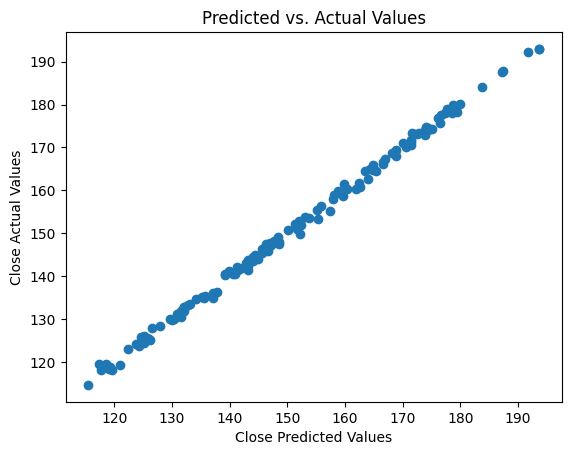

In [37]:
import matplotlib.pyplot as plt

lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(lr_y_predict, y_test)  # y is your actual target values
plt.xlabel("Close Predicted Values")
plt.ylabel("Close Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()